## Observations and Insights 

In [76]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID",how="left")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [77]:
# Checking the number of mice in the DataFrame.
mice_count = combined_data.iloc[:,0].unique()
len(mice_count)

249

In [78]:
combined_data[combined_data[["Mouse ID", "Timepoint"]].duplicated()]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [79]:
cleaned_data = combined_data.loc[combined_data["Mouse ID"]!="g989"]
mice = cleaned_data.iloc[:,0].unique()
len(mice)

248

## Summary Statistics

In [80]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groupby = cleaned_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]
regimen_groupby.median()
regimen_groupby.mean()
regimen_groupby.var()
regimen_groupby.std()
regimen_groupby.sem()

mice_stats = pd.DataFrame({"Average": regimen_groupby.mean(), 
                                 "Median": regimen_groupby.median() , 
                                 "Variance": regimen_groupby.var() ,
                                 "Standard Deviation": regimen_groupby.std() , 
                                 "SEM": regimen_groupby.sem(),
                          })

mice_stats




# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

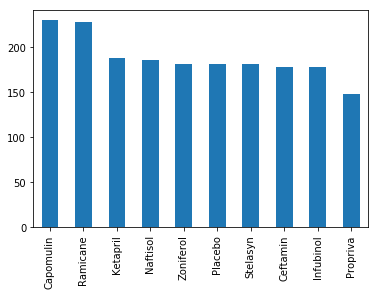

In [81]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
regimen_values = cleaned_data["Drug Regimen"].value_counts()
regimen_values.plot(kind="bar")
x = regimen_values.index
y = regimen_values.values


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

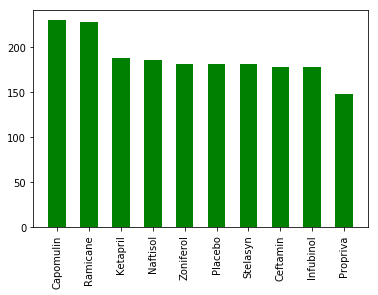

In [82]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

plt.bar(x,y, align="center", color = "g", width = .55,)
plt.xticks(rotation=90)



## Pie Plots

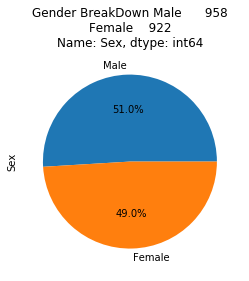

In [83]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_values = cleaned_data["Sex"].value_counts()
gender_1 = gender_values.index
gender_2 = gender_values.values

gender_pie = gender_values.plot(kind="pie", autopct='%.1f%%', y=gender_1, title=(f"Gender BreakDown {gender_values}"))

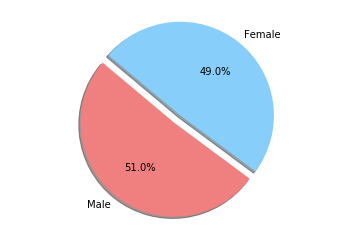

In [84]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = "Male", "Female"
sizes = [958, 922]
colors = ["lightcoral","lightskyblue"]
explode = (0.1,0.0)

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
       autopct='%1.1f%%',shadow=True, startangle=140)

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#tumors = merge_df['Tumor Volume (mm3)']
tumors1 = cleaned_data.loc[cleaned_data['Timepoint'] == 45]
tumors = tumors1['Tumor Volume (mm3)']
#tumors1 = tumors['Tumor Volume (mm3)']
quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of tumors is: {lowerq}")
print(f"The upper quartile of tumors is: {upperq}")
print(f"The interquartile range of tumors is: {iqr}")
print(f"The the median of tumors is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of tumors is: 40.6583443125
The upper quartile of tumors is: 68.8702959775
The interquartile range of tumors is: 28.211951665000008
The the median of tumors is: 63.53754596 
Values below -1.6595831850000096 could be outliers.
Values above 111.18822347500002 could be outliers.


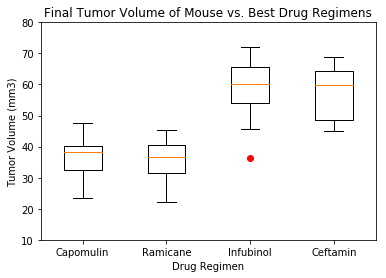

In [86]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
bestregimens = cleaned_data[cleaned_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
bestregimens = bestregimens.sort_values(["Timepoint"], ascending=True)
bestregimens
bestregimens_data = bestregimens[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
bestregimens_data
bestregimens_sort = bestregimens_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
bestregimens_sort
bestregimens_sort.head()
bestregimen = bestregimens_sort.to_frame()
bestregimen
best_four = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
regimens_final = bestregimen.reset_index()
tumor_lists = regimens_final.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(best_four)
tumor_volume = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volume, labels=best_four, sym= 'ro')
plt.title('Final Tumor Volume of Mouse vs. Best Drug Regimens')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

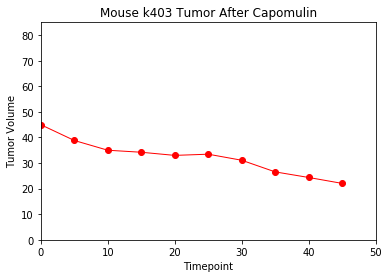

In [87]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.title("Mouse k403 Tumor After Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
Timepoint = cleaned_data.loc[cleaned_data['Mouse ID']=='k403']['Timepoint']
Capo = cleaned_data.loc[cleaned_data['Mouse ID']=='k403']['Tumor Volume (mm3)']

plt.xlim(0,50)
plt.ylim(0,85)
plt.plot(Timepoint, Capo, marker="o", color="red", linewidth=1)
plt.show()

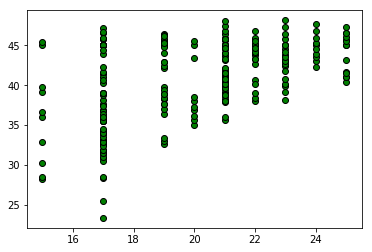

In [88]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#scatter_this = cleaned_data[cleaned_data["Drug Regimen"].isin(["Capomulin"])]
#mouse_weight = scatter_this.groupby(["Weight (g)"])
#mouse_tumor = scatter_this.groupby(["Tumor Volume (mm3)"])
#scatter_this
#plt.scatter(mouse_tumor, mouse_weight,marker="o",facecolors="red",edgecolors="black")
mouse_weight=cleaned_data.loc[cleaned_data['Drug Regimen']=='Capomulin']['Weight (g)']
mouse_tumor=cleaned_data.loc[cleaned_data['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
plt.scatter(mouse_weight, mouse_tumor,marker="o",facecolors="green",edgecolors="black")
plt.show()


## Correlation and Regression

In [89]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
scatter_this = cleaned_data[cleaned_data["Drug Regimen"].isin(["Capomulin"])]
weight = scatter_this.iloc[:,4]
tumor = scatter_this.iloc[:,6]
correlation = st.pearsonr(weight,tumor)
print(f'The correlation between both factors is {round(correlation[0],2)}')


The correlation between both factors is 0.53


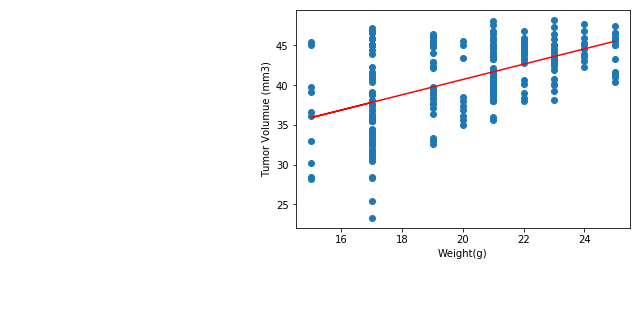

In [93]:
x_values = cleaned_data.loc[cleaned_data['Drug Regimen']=='Capomulin']['Weight (g)']
y_values = cleaned_data.loc[cleaned_data['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volumue (mm3)')
plt.show()